In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터 불러오기
df = pd.read_csv('Mall_Customers.csv')

### 데이터 기본 정보 확인

In [27]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


In [28]:
# 기초 통계 정보
print(df.describe())

       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000


In [29]:
# 결측치 확인
print(df.isnull().sum())

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [ ]:
# 이상치 확인
# 연 수입
Q1 = df['Annual Income (k$)'].quantile(0.25)    # 1사분위 값
Q3 = df['Annual Income (k$)'].quantile(0.75)    # 3사분위 값
IQR = Q3 - Q1   # IQR 계산

lower_bound = Q1 - 1.5 * IQR    # 하한 값
upper_bound = Q3 + 1.5 * IQR    # 상한 값

i_outliers = df[(df['Annual Income (k$)'] < lower_bound) | (df['Annual Income (k$)'] > upper_bound)]
print(i_outliers)
print()

# 소비 점수
Q1 = df['Spending Score (1-100)'].quantile(0.25)  # 1사분위 값
Q3 = df['Spending Score (1-100)'].quantile(0.75)  # 3사분위 값
IQR = Q3 - Q1  # IQR 계산

lower_bound = Q1 - 1.5 * IQR  # 하한 값
upper_bound = Q3 + 1.5 * IQR  # 상한 값

s_outliers = df[(df['Spending Score (1-100)'] < lower_bound) | (df['Spending Score (1-100)'] > upper_bound)]
print(s_outliers)

     CustomerID Gender  Age  Annual Income (k$)  Spending Score (1-100)
198         199   Male   32                 137                      18
199         200   Male   30                 137                      83

Empty DataFrame
Columns: [CustomerID, Gender, Age, Annual Income (k$), Spending Score (1-100)]
Index: []


### 데이터 분포 및 시각화

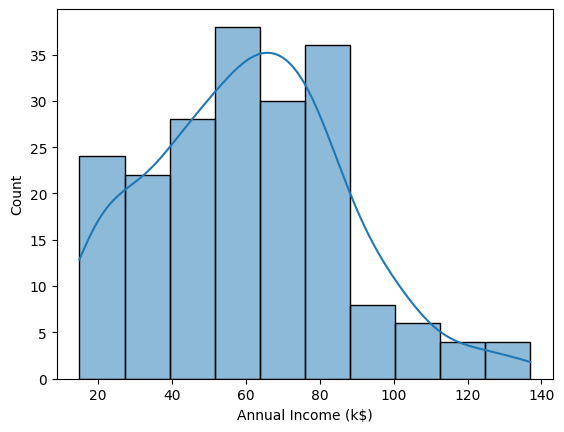

In [ ]:
# 연 수입 분포 시각화
sns.histplot(df['Annual Income (k$)'], bins=10, kde=True)
plt.show()

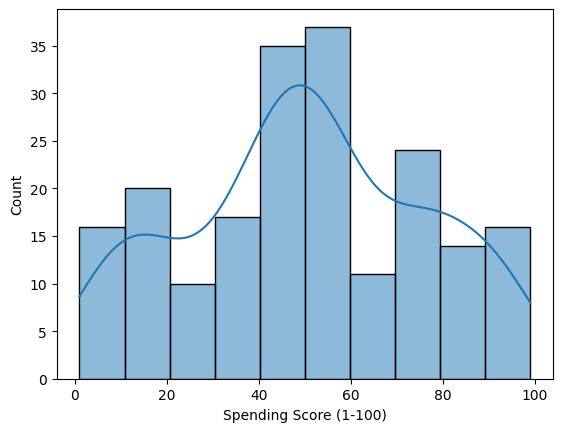

In [ ]:
# 소비 점수 분포 시각화
sns.histplot(df['Spending Score (1-100)'], bins=10, kde=True)
plt.show()

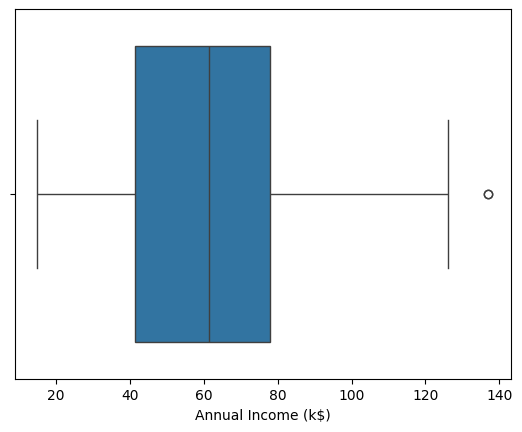

In [60]:
# 연 수입 이상치 시각화
sns.boxplot(x=df['Annual Income (k$)'])  
plt.show()

### 성별에 따른 패턴 분석

c:\Project\py_project\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Project\py_project\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Project\py_project\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50640 (\N{HANGUL SYLLABLE E}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Project\py_project\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 46384 (\N{HANGUL SYLLABLE DDA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Project\py_project\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 47480 (\N{HANGUL SYLLABLE REUN}) missing from font(s) DejaVu Sans.
  fig.canvas.p

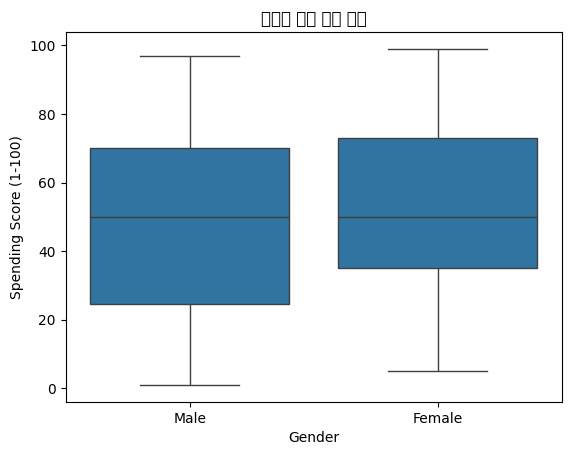

In [59]:
sns.boxplot(x='Gender', y='Spending Score (1-100)', data=df)
plt.title('성별에 따른 소비 점수')
plt.show()

# 남성은 소비 성향 차이가 크며 극단적인 소비자가 존재한다
# 여성은 평균적으로 높은 소비 점수를 가지며 상대적으로 일정한 패턴을 보인다

c:\Project\py_project\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Project\py_project\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Project\py_project\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50640 (\N{HANGUL SYLLABLE E}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Project\py_project\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 46384 (\N{HANGUL SYLLABLE DDA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Project\py_project\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 47480 (\N{HANGUL SYLLABLE REUN}) missing from font(s) DejaVu Sans.
  fig.canvas.p

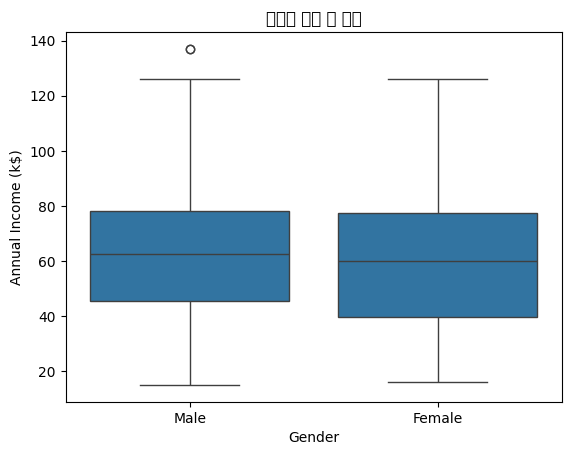

In [ ]:
sns.boxplot(x='Gender', y='Annual Income (k$)', data=df)
plt.title('성별에 따른 연 수입')
plt.show()

# 남성의 연 수입이 균일한 편이지만 높은 이상치가 존재한다
# 여성의 연 수입 변동성이 상대적으로 큰 편이다

### 나이에 따른 패턴 분석

c:\Project\py_project\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 45208 (\N{HANGUL SYLLABLE NA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Project\py_project\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Project\py_project\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50640 (\N{HANGUL SYLLABLE E}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Project\py_project\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 46384 (\N{HANGUL SYLLABLE DDA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Project\py_project\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 47480 (\N{HANGUL SYLLABLE REUN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_fi

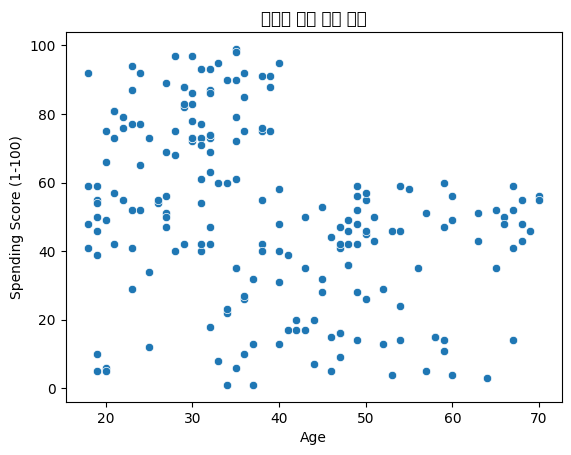

In [61]:
sns.scatterplot(x='Age', y='Spending Score (1-100)', data=df)
plt.title('나이에 따른 소비 점수')
plt.show()

# 나이가 어릴수록 소비 점수가 큰 경향이 있다

### 연 수입과 소비 점수 관계 분석

c:\Project\py_project\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Project\py_project\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Project\py_project\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51077 (\N{HANGUL SYLLABLE IB}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Project\py_project\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44284 (\N{HANGUL SYLLABLE GWA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Project\py_project\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49548 (\N{HANGUL SYLLABLE SO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_

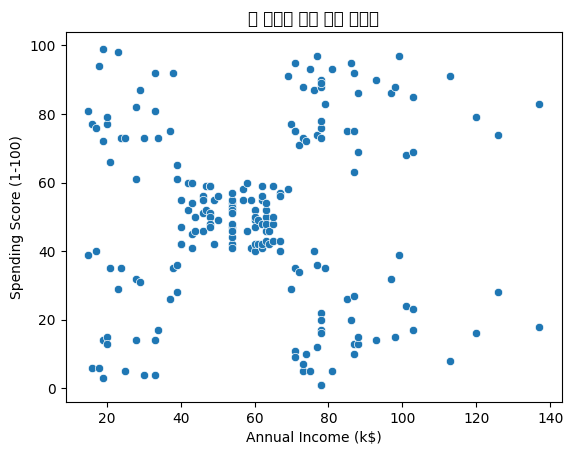

In [62]:
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df)
plt.title('연 수입과 소비 점수 산점도')
plt.show()

EDA 결과 보고서 :
1. 여성이 남성에 비해 소비 점수가 높은 경향을 보인다.
2. 나이가 어린 세대에서 소비 점수가 높은 경향을 보인다.
3. 연 수입과 소비 점수의 상관 관계가 크지 않다.

가설 : 연 수입과 관계 없이 나이가 어린 여성일수록 소비를 많이 하는 경향이 있다.